# US Accidents Exploratory Data Analysis

In [ ]:
pip install opendatasets --upgrade --quiet

## Download the Data

In [ ]:
import opendatasets as od # To download datasets from kaggle

In [ ]:
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
data_path = '/content/us-accidents/US_Accidents_Dec20_updated.csv'

## Preparation and Cleaning of the Data
1. Load the file using pandas
2. Look for information about the data and in columns
3. Fix any missing values and correct it

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import folium
from folium.plugins import HeatMap

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
 column_names = df.columns
 print(column_names)

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [ ]:
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
# How many numerical columns do we have in this data?
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [ ]:
df.isna() # Gives True where there is missing value or null
df.isna().sum().sort_values(ascending=False)# Gives total number of missing values in that column

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
City                          83
Nautical_Twilight             83
Astronomical_Twilight         83
Civil_Twilight                83
Sunrise_Sunset                83
Amenity                        0
Bump                           0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Street    

# Percentage of missing values per column

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending = False)/ len(df)
missing_percentages   

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Civil_Twilight           0.000055
Sunrise_Sunset           0.000055
Amenity                  0.000000
Bump                     0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.000000
End_Lng                  0.000000
Distance(mi)             0.000000
Description   

In [ ]:
type(missing_percentages)

pandas.core.series.Series

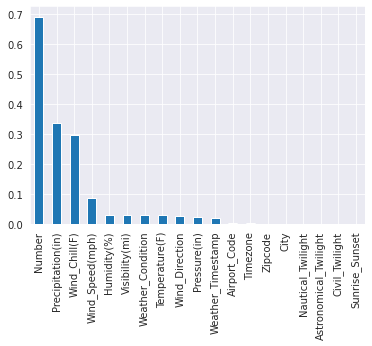

In [ ]:
missing_percentages[missing_percentages!=0].plot(kind='bar') # Indexing, where ther are not missing values

## Exploratory Analysis and Visualisation
1. Columns to analyse:
  - State
  - City
  - Weather_Condition
  - Start_Latitude and Start_Longitude


### State

In [ ]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
1516059    CA
1516060    CA
1516061    CA
1516062    CA
1516063    CA
Name: State, Length: 1516064, dtype: object

In [ ]:
df.State.unique()# Different states in US

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [ ]:
state_by_accidents = df.State.value_counts()
state_by_accidents

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

In [ ]:
# State with maximum no. of accidents
max = state_by_accidents.max()
state_by_accidents[state_by_accidents==max]

CA    448833
Name: State, dtype: int64

In [ ]:
# State with minimum no. of accidents
min = state_by_accidents.min()
state_by_accidents[state_by_accidents==min]

SD    213
Name: State, dtype: int64

In [ ]:
state_by_accidents[:10] # Top 10 states with accidents

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
Name: State, dtype: int64

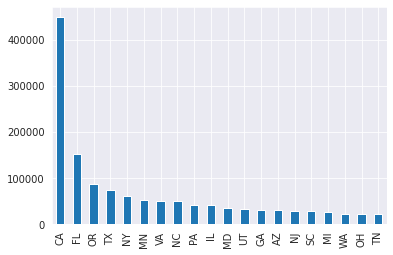

In [ ]:
state_by_accidents[:20].plot(kind='bar')

- California has highest number of accidents with 448833
- South Dakota has minimum number of accidents with only 213

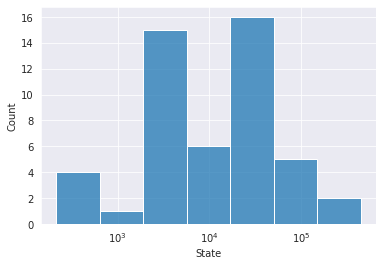

In [ ]:
sns.histplot(state_by_accidents,log_scale=True)

In [ ]:
# Groupby
state_wise_counts = df.groupby('State')['ID'].count()
state_wise_counts.head()

State
AL      9375
AR      4373
AZ     30185
CA    448833
CO     19809
Name: ID, dtype: int64

In [ ]:
# Sorted state_wise_counts
state_wise_counts=state_wise_counts.sort_values(ascending=False)
state_wise_counts.head()

State
CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
Name: ID, dtype: int64

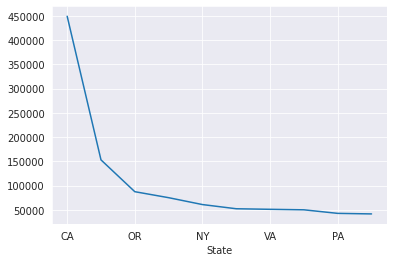

In [ ]:
state_wise_counts[:10].plot()

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

In [ ]:
lat_lon_ca_pairs = zip(sample_df.Start_Lat[sample_df.State=='CA'],sample_df.Start_Lng[sample_df.State=='CA'])

In [ ]:
# California state heat map
map = folium.Map()
HeatMap(lat_lon_ca_pairs).add_to(map)
map

### Weather_Condition

In [ ]:
df.Weather_Condition.describe()

count     1472057
unique        116
top          Fair
freq       465252
Name: Weather_Condition, dtype: object

In [ ]:
list(df.Weather_Condition)[:10]

['Light Rain',
 'Light Rain',
 'Overcast',
 'Overcast',
 'Overcast',
 'Light Rain',
 'Overcast',
 'Overcast',
 'Mostly Cloudy',
 'Snow']

In [ ]:
wc_id_counts = df.groupby('Weather_Condition')['ID'].count()
wc_id_counts.head()

Weather_Condition
Blowing Dust                78
Blowing Dust / Windy        79
Blowing Snow               144
Blowing Snow / Windy        63
Clear                   180223
Name: ID, dtype: int64

In [ ]:
wc_id_counts.describe

<bound method NDFrame.describe of Weather_Condition
Blowing Dust                78
Blowing Dust / Windy        79
Blowing Snow               144
Blowing Snow / Windy        63
Clear                   180223
                         ...  
Tornado                      2
Volcanic Ash                 4
Widespread Dust             43
Wintry Mix                1251
Wintry Mix / Windy          30
Name: ID, Length: 116, dtype: int64>

In [ ]:
wc_id_counts.sort_values(ascending=False)

Weather_Condition
Fair                         465252
Mostly Cloudy                193595
Clear                        180223
Cloudy                       161291
Partly Cloudy                133102
                              ...  
Low Drifting Snow                 1
Heavy Blowing Snow                1
Sand / Dust Whirls Nearby         1
Mist / Windy                      1
Heavy Freezing Drizzle            1
Name: ID, Length: 116, dtype: int64

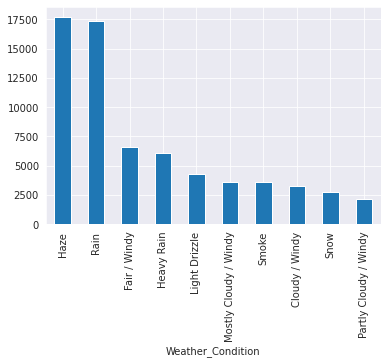

In [ ]:
wc_id_counts.sort_values(ascending=False)[10:20].plot(kind='bar')

- Rain is the cause of 17500 accidents and heavy rain around 5000
- Weather conditions doesn't have much effect on the probablity conditins as the maximum number of accidents happened in clear sky

In [ ]:
lat_lon_rain_pairs = zip(sample_df.Start_Lat[sample_df.Weather_Condition=='Rain'],sample_df.Start_Lng[sample_df.Weather_Condition=='Rain'])

In [ ]:
map = folium.Map()
HeatMap(lat_lon_rain_pairs).add_to(map)
map

- New York and washington are the two cities, whith most accidents due to rain

### City

In [ ]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [ ]:
cities = df.City.unique()
total_cities = len(cities)
print("Total no. of cities:",total_cities) # Total number of cities

Total no. of cities: 10658


In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles            39984
Miami                  36233
Charlotte              22203
Houston                20843
Dallas                 19497
                       ...  
South Bloomingville        1
Snowmass                   1
Hermanville                1
Winnabow                   1
Yarnell                    1
Name: City, Length: 10657, dtype: int64

In [ ]:
cities_by_accident[:20] # Top 10 cities with highest no. of accidents

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

In [ ]:
'New York' in df.City  # New York data is not avaiable in this dataset

False

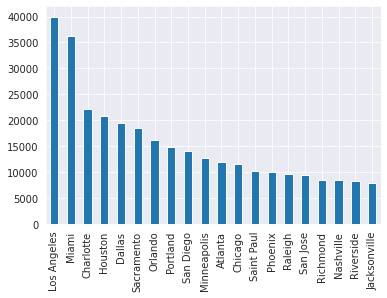

In [ ]:
cities_by_accident[:20].plot(kind='bar')

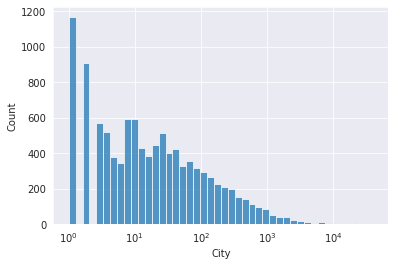

In [ ]:
sns.histplot(cities_by_accident,log_scale=True)

In [ ]:
type(cities_by_accident)

pandas.core.series.Series

In [ ]:
cities_by_accident[cities_by_accident == 1]

Fort Yates             1
Marmarth               1
Lebo                   1
Reeder                 1
Robeline               1
                      ..
South Bloomingville    1
Snowmass               1
Hermanville            1
Winnabow               1
Yarnell                1
Name: City, Length: 1167, dtype: int64

In [ ]:
city_1 = cities_by_accident[cities_by_accident == 1].sum() #cities where only 1 accident happened
city_2 = cities_by_accident[cities_by_accident == 2].sum()
print(" Number of Cities with only one accident:",city_1)
print(" Number of Cities with two accidents:",city_2)


 Number of Cities with only one accident: 1167
 Number of Cities with two accidents: 1818


### Start Time

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time # Timestamps

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


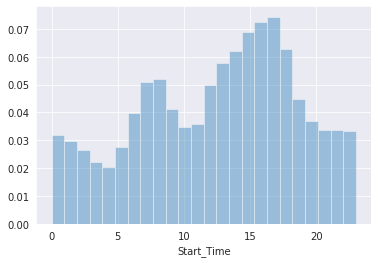

In [ ]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


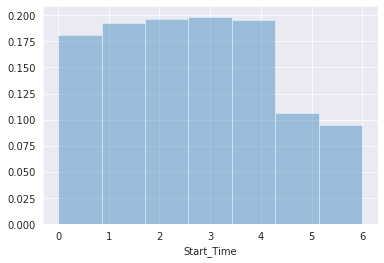

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


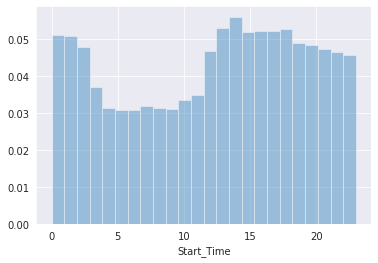

In [ ]:
sundays_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==5]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


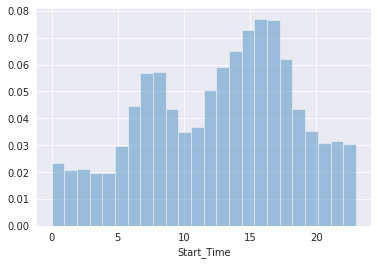

In [ ]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


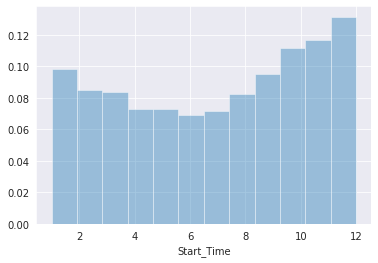

In [ ]:
df_2019=df[df.Start_Time.dt.year==2018]

sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)


### Start Latitude and Longitude

In [ ]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [ ]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

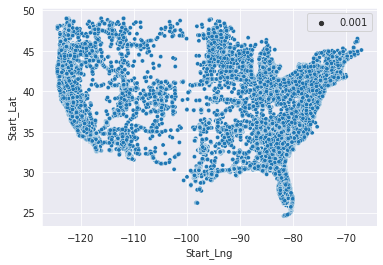

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [ ]:
import folium

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.108909999999995, -83.09286)

In [ ]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

1037294    38.641376
188841     39.905513
1165963    45.330918
1168337    42.272390
1392917    41.107990
             ...    
1143534    34.764939
26882      38.969130
25694      38.970973
833366     37.166820
200659     42.660740
Name: Start_Lat, Length: 100, dtype: float64
1037294   -121.472854
188841     -77.656554
1165963   -122.969360
1168337    -85.295520
1392917    -73.408820
              ...    
1143534   -118.732901
26882      -92.336480
25694      -94.357968
833366    -122.026190
200659     -71.192610
Name: Start_Lng, Length: 100, dtype: float64


In [ ]:
zip(list(df.Start_Lat), list(df.Start_Lng))# To get pairs of latitude and longitude

In [ ]:
sample_df = df.sample(int(0.01 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Questions and Answers
1. Are there more accidents in warmer of colder areas?
2. Which 5 states have the highest number of accidents?
3. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
4. What time of the day are accidents most frequent in? - ANSWERED
5. Which days of the week have the most accidents?
6. Which months have the most accidents?
7. What is the trend of accidents year over year decreasing/increasing?
8. When is accidents per unit of traffic the highest.

## Summary and Conclusion
- No data from New York
- The number of accidents per city decreases exponentially
- Less than 5% of cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident (need to investigate)